In [1]:
from sklearn.datasets import load_digits
from sklearn.model_selection import cross_val_score, validation_curve, GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier
import numpy as np
import matplotlib.pyplot as plt

In [2]:
digits = load_digits()
X = digits.data
y = digits.target

### 1

In [3]:
dtc = DecisionTreeClassifier(random_state=0)
cross_val_score(dtc, X, y, cv=10, n_jobs=-1).mean()

0.8241247672253259

### 2

In [4]:
dtc = DecisionTreeClassifier(random_state=0)
bc = BaggingClassifier(dtc, 100, random_state=0)
cross_val_score(bc, X, y, cv=10, n_jobs=-1).mean()

0.9253786468032278

### 3

In [5]:
d = int(np.sqrt(X.shape[1]))
dtc = DecisionTreeClassifier(random_state=0)
bc = BaggingClassifier(dtc, 100, max_features=d, random_state=0)
cross_val_score(bc, X, y, cv=10, n_jobs=-1).mean()

0.9304283054003726

### 4

In [6]:
d = int(np.sqrt(X.shape[1]))
dtc = DecisionTreeClassifier(max_features=d, random_state=0)
bc = BaggingClassifier(dtc, 100, random_state=0)
cross_val_score(bc, X, y, cv=10, n_jobs=-1).mean()

0.9510211049037863

### 5

In [7]:
rfc = RandomForestClassifier(random_state=0)
cross_val_score(rfc, X, y, cv=10, n_jobs=-1).mean()

0.9476939788950961

1) Случайный лес сильно переобучается с ростом количества деревьев

2) При очень маленьком числе деревьев (5, 10, 15), случайный лес работает хуже, чем при большем числе деревьев [+]

3) С ростом количества деревьев в случайном лесе, в какой-то момент деревьев становится достаточно для высокого качества классификации, а затем качество существенно не меняется [+]

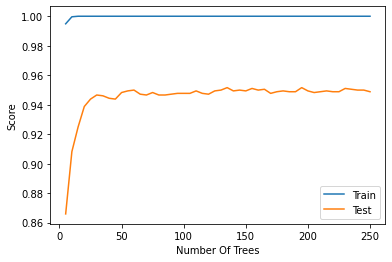

In [8]:
param_range = np.arange(5, 251, 5)
train_scores, test_scores = validation_curve(RandomForestClassifier(random_state=0), X, y, 
                                             param_name="n_estimators", 
                                             param_range=param_range,
                                             cv=10,
                                             n_jobs=-1)
train_mean = np.mean(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
plt.plot(param_range, train_mean, label="Train")
plt.plot(param_range, test_mean, label="Test")
plt.xlabel("Number Of Trees")
plt.ylabel("Score")
plt.legend()
plt.show()

In [9]:
n_estimators = [5, 10, 15, 100]
params = {'n_estimators': n_estimators}
rfc = RandomForestClassifier(random_state=0)
rfc_grid = GridSearchCV(rfc, params, cv=10, scoring="accuracy", n_jobs=-1)
rfc_grid.fit(X, y)
for pair in zip(n_estimators, rfc_grid.cv_results_['mean_test_score']):
    print('{} : {}'.format(pair[0], pair[1]))

5 : 0.8659186840471756
10 : 0.908181253879578
15 : 0.924866542520174
100 : 0.9476939788950961


---

4) При большом количестве признаков (для данного датасета - 40, 50) качество классификации становится хуже, чем при малом количестве признаков (5, 10). Это связано с тем, что чем меньше признаков выбирается в каждом узле, тем более различными получаются деревья (ведь деревья сильно неустойчивы к изменениям в обучающей выборке), и тем лучше работает их композиция [+]

5) При большом количестве признаков (40, 50, 60) качество классификации лучше, чем при малом количестве признаков (5, 10). Это связано с тем, что чем больше признаков - тем больше информации об объектах, а значит алгоритм может делать прогнозы более точно

In [10]:
max_features = [5, 10, 40, 50, 60]
params = {'max_features': max_features}
rfc = RandomForestClassifier(random_state=0)
rfc_grid = GridSearchCV(rfc, params, cv=10, scoring="accuracy", n_jobs=-1)
rfc_grid.fit(X, y)
for pair in zip(max_features, rfc_grid.cv_results_['mean_test_score']):
    print('{} : {}'.format(pair[0], pair[1]))

5 : 0.9471322160148976
10 : 0.9471229050279328
40 : 0.9370887647423961
50 : 0.9348572315332092
60 : 0.9253910614525139


---

6) При небольшой максимальной глубине деревьев (5-6) качество работы случайного леса намного лучше, чем без ограничения глубины, т.к. деревья получаются не переобученными. С ростом глубины деревьев качество ухудшается

7) При небольшой максимальной глубине деревьев (5-6) качество работы случайного леса заметно хуже, чем без ограничений, т.к. деревья получаются недообученными. С ростом глубины качество сначала улучшается, а затем не меняется существенно, т.к. из-за усреднения прогнозов и различий деревьев их переобученность в бэггинге не сказывается на итоговом качестве (все деревья преобучены по-разному, и при усреднении они компенсируют переобученность друг-друга) [+]

In [11]:
for max_depth in range(5, 7):
    rfc = RandomForestClassifier(max_depth=max_depth, random_state=0)
    print(f'{max_depth}: {cross_val_score(rfc, X, y, cv=10, n_jobs=-1).mean()}')
rfc = RandomForestClassifier(random_state=0)
print(f'Без ограничений: {cross_val_score(rfc, X, y, cv=10, n_jobs=-1).mean()}')

5: 0.9187368094351335
6: 0.9293047796399752
Без ограничений: 0.9476939788950961
